In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("newdata/data.csv", parse_dates=['report_date'])

c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [3]:
data_arg = data[(data.location == 'Argentina-Catamarca') & (data.data_field_code == 'AR0005')]
data_arg.drop(['time_period', 'time_period_type'], axis=1, inplace=True)
data_arg.head(10)

c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,report_date,location,location_type,data_field,data_field_code,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases


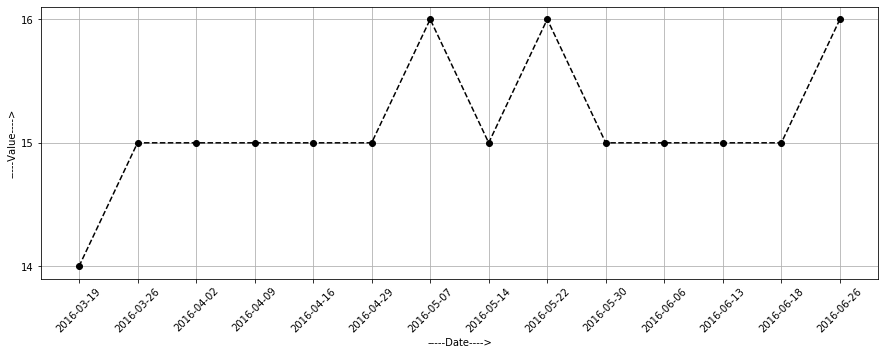

In [4]:
fig = plt.figure(figsize=(15, 5))
plt.plot(data_arg.report_date, data_arg.value, '--o', color='k')
plt.xlabel("-----Date---->")
plt.ylabel("-----Value---->")
plt.xticks(rotation=45)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)
plt.grid()
plt.show()


# 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0, 0.5, '-----Value---->')

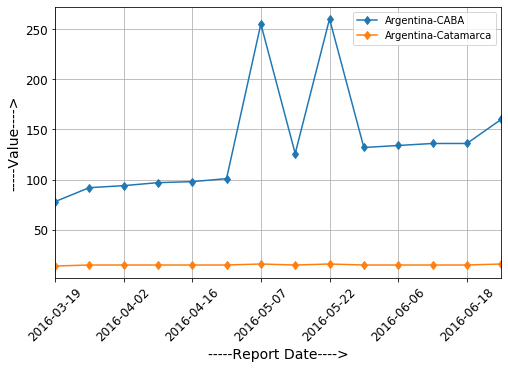

In [5]:
data_caba = data[data.location=='Argentina-CABA']
data_cata = data[data.location == 'Argentina-Catamarca']

new_caba = data_caba[['report_date', 'value']]
new_caba['value'] = pd.to_numeric(data_caba.value, downcast='integer')
a=new_caba.groupby(new_caba.report_date).sum()

new_cata = data_cata[['report_date', 'value']]
new_cata['value'] = pd.to_numeric(data_cata.value, downcast='integer')
b=new_cata.groupby(new_cata.report_date).sum()

c = data_cata.report_date.unique()

df = pd.DataFrame({
    'Argentina-CABA':list(a.value),
    'Argentina-Catamarca':list(b.value)
}, index=list(data_caba.report_date.unique()))
df.plot(kind='line', marker='d', figsize=(8, 5), rot=45, fontsize=12)
plt.grid()
plt.rc('axes', labelsize=14) 
plt.xlabel('-----Report Date---->')
plt.ylabel('-----Value---->')

# 3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'


In [6]:
data_bue = data[data.location=='Argentina-Buenos_Aires']
data_bue.head(3)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases


c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

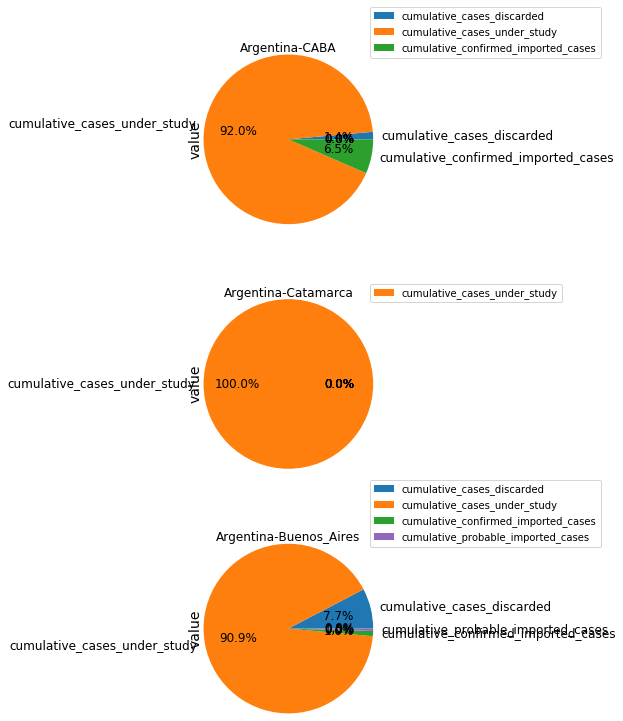

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,12))

caba = data_caba[['data_field', 'value']]
caba['value'] = pd.to_numeric(caba.value, downcast='integer')
pieCaba = caba.groupby(caba.data_field).sum()
pieCaba.value.plot(kind='pie', ax=axes[0], legend=True, autopct='%1.1f%%', textprops={'fontsize': 12}, radius=1.3)
axes[0].title.set_text('Argentina-CABA')
axes[0].legend(loc=(1,1))


cata = data_cata[['data_field', 'value']]
cata['value'] = pd.to_numeric(cata.value, downcast='integer')
pieCata = cata.groupby(cata.data_field).sum()
pieCata.value.plot(kind='pie', ax=axes[1], legend=True, autopct='%1.1f%%', textprops={'fontsize': 12}, radius=1.3)
axes[1].title.set_text('Argentina-Catamarca')
axes[1].legend(loc=(1,1))

bue = data_bue[['data_field', 'value']]
bue['value'] = pd.to_numeric(bue.value, downcast='integer')
pieBue = bue.groupby(bue.data_field).sum()
pieBue.value.plot(kind='pie', ax=axes[2], legend=True, autopct='%1.1f%%', textprops={'fontsize': 12}, radius=1.3)
axes[2].title.set_text('Argentina-Buenos_Aires')
axes[2].legend(loc=(1,1))

fig.subplots_adjust(hspace=0.5, wspace=0.5)

# 4. Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good

In [24]:
#The following Python code gives you the expected word that you wanted to write and also shows you the list of words that may 
#have been in your mind. This code goes through a long list of words(from big.txt).
#The code also tells if a word is not available in the list. Try putting in "Veneer" or "Nepotism"(correctly).

dictionary = set()

def read_dict():
    global dictionary

    if dictionary:
        return

    with open("big.txt", 'r') as f:
        text = f.read()

    dictionary = set(
        word.lower() for word in text.split()
    )


def isSpelledCorrectly(word):
    word = word.lower()
    read_dict()
    return word in dictionary



inpWord = input("Enter a Word: ")

wordList =  []
flag=0

if(isSpelledCorrectly(inpWord)):
    print("You have got it correct!!!")
else:
    from spellchecker import SpellChecker
    spell = SpellChecker()
    wordList.append(inpWord)
    misspelled = spell.unknown(wordList)
    for w in misspelled:
        flag=1
        if(spell.correction(w)):
            print("You have got it wrong!!!")
            print("Did you mean: ")
            print(spell.correction(w))
            print("Other Variants: ")
            print(spell.candidates(w))
            
if flag==0:
    print("This word might not be in my Dictionary!!")
        

Enter a Word: sherlkc
You have got it wrong!!!
Did you mean: 
sherlock
Other Variants: 
{'sherlock', 'shellac', 'sherek'}


In [25]:
#Submitted by:-
#Gagandeep Kaur
#Guru Nanak Dev University, Amritsar